In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = pd.read_csv('SA17A-contr.csv', index_col=0)
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008.0,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007.0,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007.0,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037.0,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
41,"Trump, Donald J.","MOCEK, GREGORY",WASHINGTON,20007.0,CADWALADER,ATTORNEY,-2700.0,2017-01-20,SA17A,SA17A.445455,G2016


In [3]:
df.dtypes

cand_nm               object
contbr_nm             object
contbr_city           object
contbr_zip           float64
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
form_tp               object
tran_id               object
election_tp           object
dtype: object

In [4]:
# convert zip to 5 num string 
df['contbr_zip'] = df.contbr_zip.astype('str')
df.contbr_zip = df['contbr_zip'].apply(lambda x: x[0:5])

In [5]:
# convert receipt date to datetime format 
df.contb_receipt_dt = pd.to_datetime(df.contb_receipt_dt)
df.dtypes

cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
form_tp                      object
tran_id                      object
election_tp                  object
dtype: object

In [6]:
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
41,"Trump, Donald J.","MOCEK, GREGORY",WASHINGTON,20007,CADWALADER,ATTORNEY,-2700.0,2017-01-20,SA17A,SA17A.445455,G2016


In [7]:
df = df.loc[df.contb_receipt_amt > 1]
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
42,"Trump, Donald J.","ROSE, JUDAH",WASHINGTON,20007,ICF,CONSULTANT,35.0,2018-06-19,SA17A,SA17A.1289423,P2020


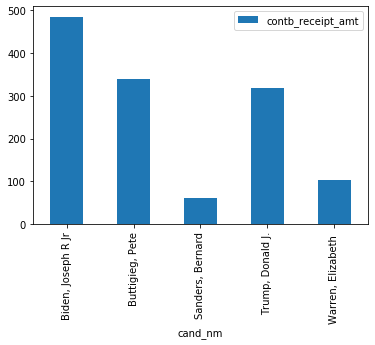

In [8]:
df.groupby('cand_nm').mean().plot.bar()

In [9]:
# standard scaling
outcome = 'cand_nm'
x_cols = ['contb_receipt_amt']
for col in x_cols:
     df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,0.047819,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,-0.280724,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,-0.280724,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037,RETIRED,RETIRED,-0.181397,2017-12-30,SA17A,SA17A.1019056,P2020
42,"Trump, Donald J.","ROSE, JUDAH",WASHINGTON,20007,ICF,CONSULTANT,-0.280724,2018-06-19,SA17A,SA17A.1289423,P2020


In [11]:
df = df[['contb_receipt_amt', 'cand_nm']]
df = pd.get_dummies(df, columns = ['cand_nm'], drop_first=True)
df.head()

,contb_receipt_amt,"cand_nm_Buttigieg, Pete","cand_nm_Sanders, Bernard","cand_nm_Trump, Donald J.","cand_nm_Warren, Elizabeth"
0,0.047819,0,0,1,0
23,-0.280724,0,0,1,0
26,-0.280724,0,0,1,0
29,-0.181397,0,0,1,0
42,-0.280724,0,0,1,0


In [12]:
sns.lmplot(df.contb_receipt_amt, data=df)

KeyError: "None of [Float64Index([-0.33263359641867074,  -0.3321446018762705, -0.33191538568452034,\n              -0.33176257489002026,  -0.3314416722215701, -0.33133470466542003,\n              -0.33115133171201994,  -0.3309221155202698, -0.33038727773951954,\n               -0.3300816561505194,\n              ...\n                4.4029270819005495,    4.708548670900716,    4.859739670979097,\n                5.1669810544009644,     5.47260264340113,   6.6950889994017935,\n                 7.306332177402125,    8.223196944402623,    22.58741162741042,\n                 63.54180479115305],\n             dtype='float64', length=584)] are in the [columns]"

In [ ]:
# predictor variable 
X = df['contb_receipt_amt'].values

# target variable
y = df['cand_nm']

X = sm.add_constant(X)
model = sm.OLS(y,X, hasconst=False)
result = model.fit()
result.summary()